### IMPORTING LIBRARIES

In [44]:
# Importing libraries

from ucimlrepo import fetch_ucirepo 
import numpy as np    # linear algebra
import pandas as pd   # data processing
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import KBinsDiscretizer
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

### DATASET ANALYSIS

In [45]:
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [46]:
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)

# If you want to combine X and y into a single DataFrame
conc_data = pd.concat([X_df, y_df], axis=1)
conc_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [47]:
print("No of rows in dataset before preprocessing : ", len(conc_data))

No of rows in dataset before preprocessing :  48842


In [48]:
# Number of instances and attributes
conc_data.shape

(48842, 15)

In [49]:
conc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [50]:
# Sum of the missing cells of each attribute
conc_data.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

### EXPLORATORY DATA ANALYSIS

In [51]:
# Categorical variables
cat_cols = []
for col in conc_data.columns:
    if conc_data[col].dtype == 'O':
        cat_cols.append(col)

In [52]:
cat_cols

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

In [53]:
# education-num column should also be categorical so we will add it
cat_cols.append('education-num')

In [54]:
conc_data[cat_cols]

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income,education-num
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K,13
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K,13
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K,9
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K,7
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K,13
...,...,...,...,...,...,...,...,...,...,...
48837,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,United-States,<=50K.,13
48838,NaN,HS-grad,Widowed,NaN,Other-relative,Black,Male,United-States,<=50K.,9
48839,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K.,13
48840,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,United-States,<=50K.,13


In [55]:
# We have an imbalanced dataset
for col in cat_cols:
    print(conc_data[col].value_counts())
    print()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial   

In [56]:
# Numerical columns
num_cols = set(conc_data.columns).difference(cat_cols)

In [57]:
num_cols = list(num_cols)
num_cols

['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'fnlwgt']

<Figure size 1000x3000 with 0 Axes>

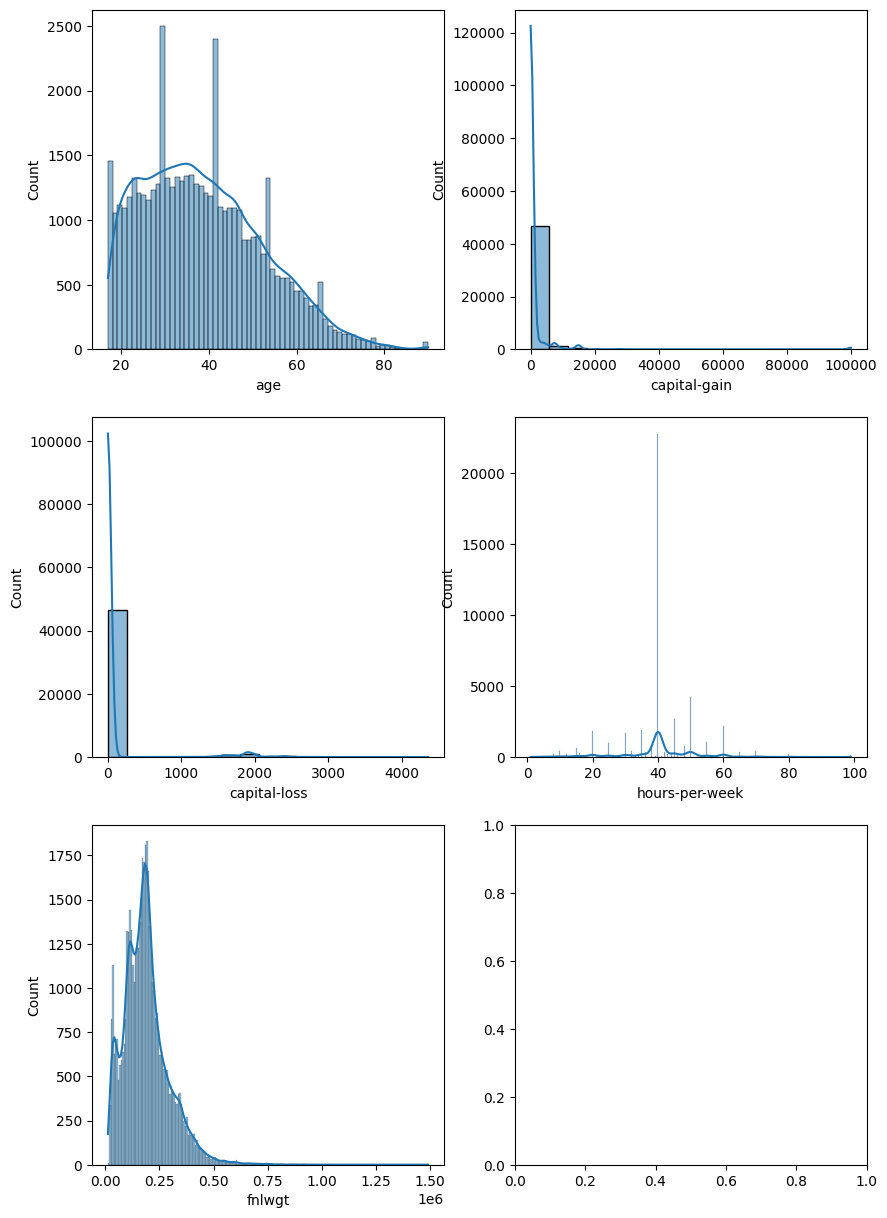

In [58]:
plt.figure(figsize = (10, 30))

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (10, 15))

axes = axes.flatten()

for i,col in enumerate(num_cols):
    sns.histplot(conc_data[col], kde = True, ax = axes[i])
    
plt.show()

### DATA CLEANING

In [59]:
# Counting the number of unique values
conc_data.nunique()

age                  74
workclass             9
fnlwgt            28523
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       42
income                4
dtype: int64

In [60]:
# Printing unique values for each column
for column in conc_data.columns:
    unique_values = conc_data[column].unique()
    print(f"{column} unique values:")
    print(unique_values)
    print("\n")

age unique values:
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]


workclass unique values:
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]


fnlwgt unique values:
[ 77516  83311 215646 ... 173449  89686 350977]


education unique values:
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']


education-num unique values:
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


marital-status unique values:
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']


occupation unique values:
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Othe

In [61]:
# Checking the count of '?' in each columns.
conc_data.isin(['?']).sum(axis=0)

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [62]:
# Only workclass, occupation and native.country has unknown values
# Imputing with mode values
for col in ['workclass', 'occupation', 'native-country']:
    conc_data[col].replace('?', pd.NA, inplace=True)

In [63]:
# Dropping the rows with NaN in the above columns
conc_data = conc_data.dropna(subset=['workclass', 'occupation', 'native-country'])

In [64]:
# Printing the unique values after droppping
for col in ['workclass', 'occupation', 'native-country']:
    print(f"{col} unique values after removing '?':")
    print(conc_data[col].unique())

workclass unique values after removing '?':
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay']
occupation unique values after removing '?':
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Transport-moving' 'Farming-fishing'
 'Machine-op-inspct' 'Tech-support' 'Craft-repair' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']
native-country unique values after removing '?':
['United-States' 'Cuba' 'Jamaica' 'India' 'Mexico' 'Puerto-Rico'
 'Honduras' 'England' 'Canada' 'Germany' 'Iran' 'Philippines' 'Poland'
 'Columbia' 'Cambodia' 'Thailand' 'Ecuador' 'Laos' 'Taiwan' 'Haiti'
 'Portugal' 'Dominican-Republic' 'El-Salvador' 'France' 'Guatemala'
 'Italy' 'China' 'South' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands']


In [65]:
# Replacing the income values which has the . without it
conc_data['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'}, inplace=True)

In [66]:
# Printing unique values for each column
for column in conc_data.columns:
    unique_values = conc_data[column].unique()
    print(f"{column} unique values:")
    print(unique_values)
    print("\n")

age unique values:
[39 50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80 84 83 85 82 86
 89 87]


workclass unique values:
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay']


fnlwgt unique values:
[ 77516  83311 215646 ... 173449  89686 350977]


education unique values:
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 '7th-8th' 'Doctorate' 'Assoc-voc' 'Prof-school' '5th-6th' '10th'
 'Preschool' '12th' '1st-4th']


education-num unique values:
[13  9  7 14  5 10 12  4 16 11 15  3  6  1  8  2]


marital-status unique values:
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']


occupation unique values:
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Tra

In [67]:
# After dropping, checking the count of NaN in all columns.
conc_data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [68]:
conc_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   fnlwgt          45222 non-null  int64 
 3   education       45222 non-null  object
 4   education-num   45222 non-null  int64 
 5   marital-status  45222 non-null  object
 6   occupation      45222 non-null  object
 7   relationship    45222 non-null  object
 8   race            45222 non-null  object
 9   sex             45222 non-null  object
 10  capital-gain    45222 non-null  int64 
 11  capital-loss    45222 non-null  int64 
 12  hours-per-week  45222 non-null  int64 
 13  native-country  45222 non-null  object
 14  income          45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [69]:
print("No of rows in dataset after removing Null values and ? values : ", len(conc_data))

No of rows in dataset after removing Null values and ? values :  45222


In [70]:
conc_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


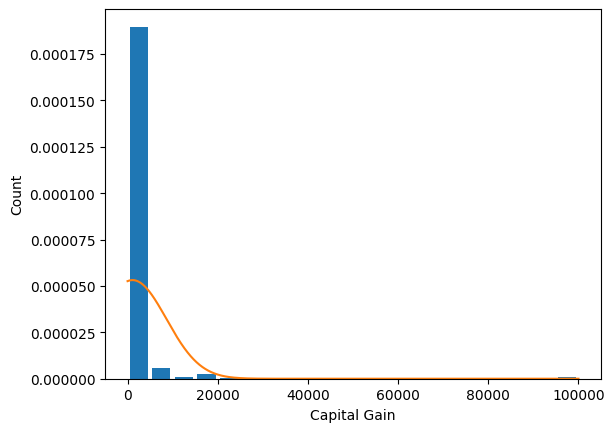

In [71]:
plt.hist(conc_data['capital-gain'], bins=20, rwidth=0.8, density=True)
plt.xlabel('Capital Gain')
plt.ylabel('Count')
rng = np.arange(conc_data['capital-gain'].min(), conc_data['capital-gain'].max(), 0.1)
plt.plot(rng, norm.pdf(rng, conc_data['capital-gain'].mean(), conc_data['capital-gain'].std()))

In [72]:
# from sklearn.cluster import KMeans
# # Divide the capital-gain values into those that are zero and those that are non-zero
# zeros = conc_data[conc_data['capital-gain'] == 0]
# non_zeros = conc_data[conc_data['capital-gain'] != 0]

# # Scale non-zero values to have mean = 0 and variance = 1 to improve clustering
# scaler = StandardScaler()
# non_zeros_scaled = scaler.fit_transform(non_zeros[['capital-gain']])

# # Determine the number of clusters; assuming we want to create 3 clusters of non-zero values
# n_clusters = 3
# kmeans = KMeans(n_clusters=n_clusters, random_state=0)
# non_zeros['cluster'] = kmeans.fit_predict(non_zeros_scaled)

# # Now, calculate the mean of non-zero values in each cluster
# cluster_means = non_zeros.groupby('cluster')['capital-gain'].mean().to_dict()

# # To equally distribute the zero values into these clusters, we will assign them in a round-robin fashion
# zero_clusters = np.tile(np.arange(n_clusters), len(zeros) // n_clusters + 1)[:len(zeros)]
# np.random.shuffle(zero_clusters)  # Shuffle the cluster assignment to distribute zeros randomly
# zeros['cluster'] = zero_clusters

# # Map the cluster means to the zero values
# zeros['capital-gain'] = zeros['cluster'].map(cluster_means)

# # Combine the zero and non-zero dataframes back together
# conc_data = pd.concat([zeros, non_zeros]).sort_index()

# # Now plot the histogram of the new capital-gain column after replacing zeros
# plt.figure(figsize=(10, 6))
# plt.hist(conc_data['capital-gain'], bins=30, rwidth=0.8, color='blue', alpha=0.7)
# plt.xlabel('Capital Gain')
# plt.ylabel('Count')
# plt.title('Histogram of Capital Gain after Cluster-based Imputation')
# plt.show()

# # Let's also return the data for inspection
# conc_data.head()

In [73]:
conc_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [74]:
# Calculate the mean excluding the zero values in 'capital-gain'
mean_value = conc_data[conc_data["capital-gain"] != 0]['capital-gain'].median()

# Replace the zero values with the mean
conc_data['capital-gain'] = conc_data['capital-gain'].replace(0, mean_value)

# Printing the results
print(conc_data['capital-gain'])
print(conc_data['capital-gain'].unique())

0        2174
1        7298
2        7298
3        7298
4        7298
         ... 
48836    7298
48837    7298
48839    7298
48840    5455
48841    7298
Name: capital-gain, Length: 45222, dtype: int64
[ 2174  7298 14084  5178  5013  2407 14344 15024  7688  4064  4386  1409
  3674  1055  2050  2176   594 20051  6849  4101  8614  3411  2597 25236
  4650  2463  3103 10605  2964  3325  2580  3471  4865 99999  6514  1471
  2329  2105  2885 10520  2202  2961 27828  6767  2228  1506 13550  2635
  5556  4787  3781  3137  3818   914   401  2829  2977  4934  2062  2354
  3464  5455 15020  1424  3273 22040  4416 10566  4931  7430 34095  6497
  3908   114  2346  2907  1151  9386  2414  2290  3418 15831 41310  4508
  2538  3456  1848  3887  7896  5721  9562  6418  1455  2036  3942  1831
 11678  2936  2993  7443  6360  4687  1797  6723  2009  3432  6097  1639
  2653 18481 25124  7978   991  1173  2387  5060  1086  1264  7262  1731]


In [75]:
# Calculate the mean excluding the zero values in 'capital-loss'
mean_value = conc_data[conc_data["capital-loss"] != 0]['capital-loss'].median()

# Replace the zero values with the mean
conc_data['capital-loss'] = conc_data['capital-loss'].replace(0, mean_value)

# Printing the results
print(conc_data['capital-loss'])
print(conc_data['capital-loss'].unique())

0        1887
1        1887
2        1887
3        1887
4        1887
         ... 
48836    1887
48837    1887
48839    1887
48840    1887
48841    1887
Name: capital-loss, Length: 45222, dtype: int64
[1887 2042 1408 1902 1719 1762 1564 2179 1816 1980 1977 1876 1340 2206
 1741 1485 2339 2415 1380 1721 2051 2377 1669 2352 1672  653 2392 1504
 1590 1651 1628 1848 2001 1740 2002 1579 2258 1602 2547 2205 1726 2444
 1138 2238  625  213 1539  880 1668 1092 1594 2231 1844  810 2824 2559
 2057 1573 1974  974 2174 2149 1735 1258 2603 2282  323 2246 1617 1648
 1825 3770 1755 3683 2129 4356 2267 2080 2457  419  155 3900 2201 1944
 2467 2754 2472 3004 1411 1429 3175 1870 1911 1510 1421 2163]


In [76]:
conc_data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,1887,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,7298,1887,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,7298,1887,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,7298,1887,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,7298,1887,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,7298,1887,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,7298,1887,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,7298,1887,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,1887,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,1887,40,United-States,>50K


In [77]:
# Removing duplicate rows
conc_data.drop_duplicates()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,1887,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,7298,1887,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,7298,1887,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,7298,1887,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,7298,1887,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,7298,1887,40,United-States,<=50K
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,7298,1887,36,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,7298,1887,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,1887,40,United-States,<=50K


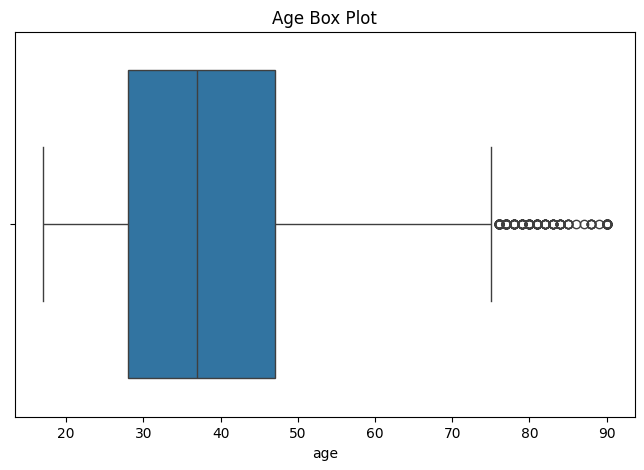

In [78]:
# Creating a box plot for the "Age" column
plt.figure(figsize=(8, 5))
sns.boxplot(x=conc_data["age"])
plt.title("Age Box Plot")
plt.show()

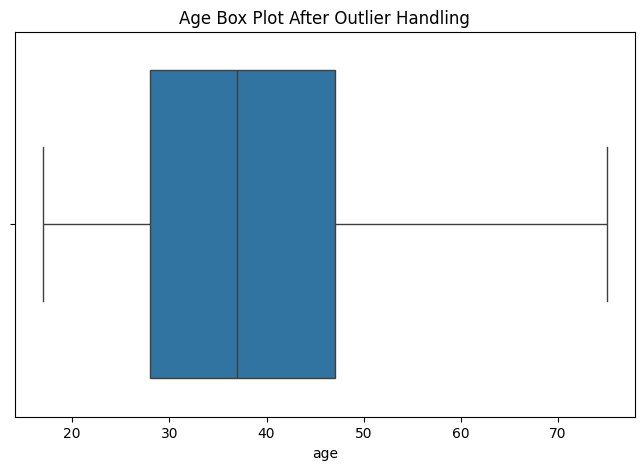

In [79]:
# Handle outliers by replacing values above 75 with the mean of values below 75
mean_age = conc_data.loc[conc_data["age"] < 75, "age"].mean()
conc_data.loc[conc_data["age"] > 75, "age"] = mean_age

# Create a box plot for the "Age" column after handling outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=conc_data["age"])
plt.title("Age Box Plot After Outlier Handling")
plt.show()

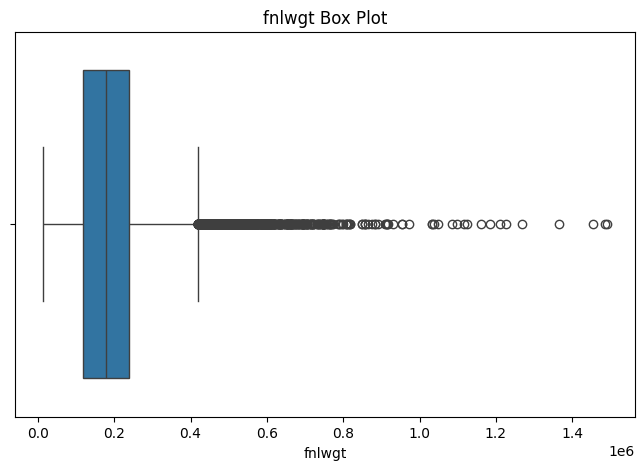

In [80]:
# Create a box plot for the "Final-Weight" column
plt.figure(figsize=(8, 5))
sns.boxplot(x=conc_data["fnlwgt"])
plt.title("fnlwgt Box Plot")
plt.show()

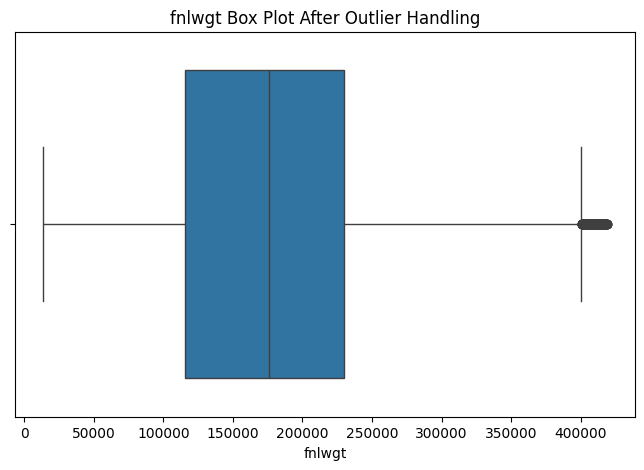

In [81]:
# Handling the outliers in Final-Weight
Q1 = conc_data['fnlwgt'].quantile(0.25)
Q3 = conc_data['fnlwgt'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
conc_data = conc_data[(conc_data['fnlwgt'] >= lower_bound) & (conc_data['fnlwgt'] <= upper_bound)]

# Create a box plot for the "fnlwgt" column after handling outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=conc_data["fnlwgt"])
plt.title("fnlwgt Box Plot After Outlier Handling")
plt.show()

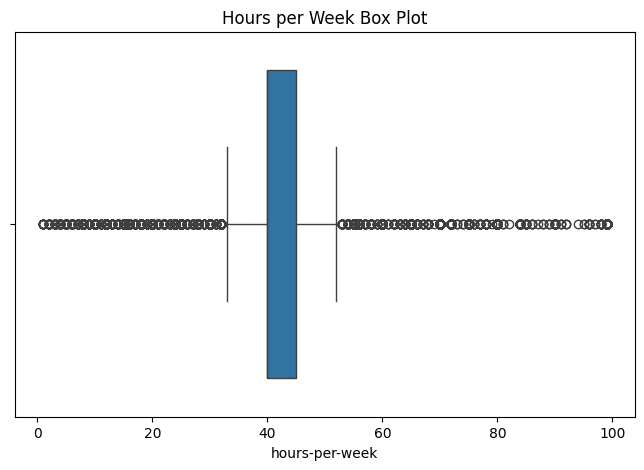

In [82]:
# Creating a box plot for the "Hours per Week" column
plt.figure(figsize=(8, 5))
sns.boxplot(x=conc_data["hours-per-week"])
plt.title("Hours per Week Box Plot")
plt.show()

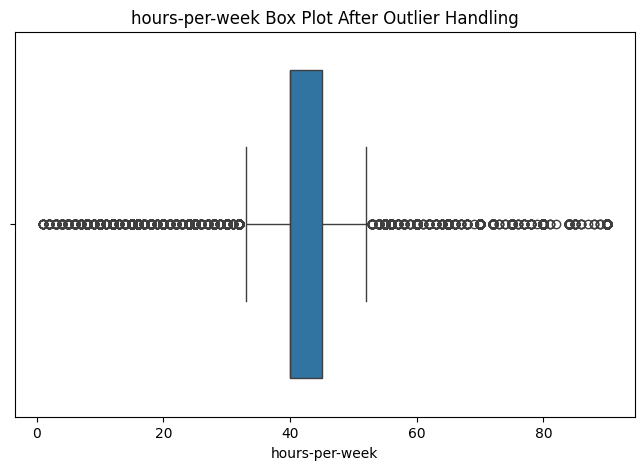

In [83]:
# Apply Winsorization to replace outliers
lower_bound = 0
upper_bound = 90
conc_data['hours-per-week'] = np.where(conc_data['hours-per-week'] < lower_bound, lower_bound, conc_data['hours-per-week'])
conc_data['hours-per-week'] = np.where(conc_data['hours-per-week'] > upper_bound, upper_bound, conc_data['hours-per-week'])

# Create a box plot for the "Hours Per Week" column after handling outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=conc_data["hours-per-week"])
plt.title("hours-per-week Box Plot After Outlier Handling")
plt.show()

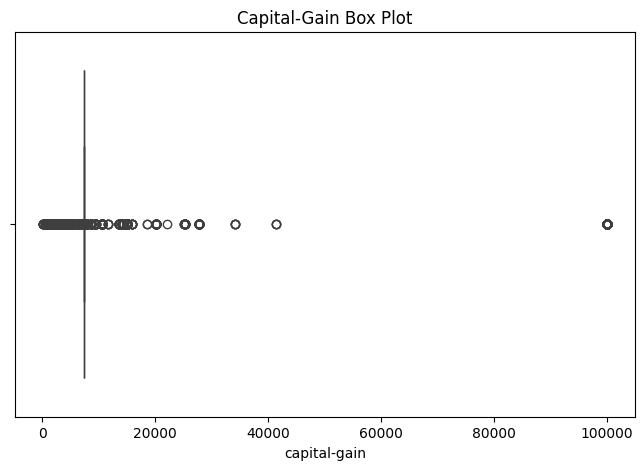

In [84]:
# Create a box plot for the "capital-gain" column
plt.figure(figsize=(8, 5))
sns.boxplot(x=conc_data["capital-gain"])
plt.title("Capital-Gain Box Plot")
plt.show()

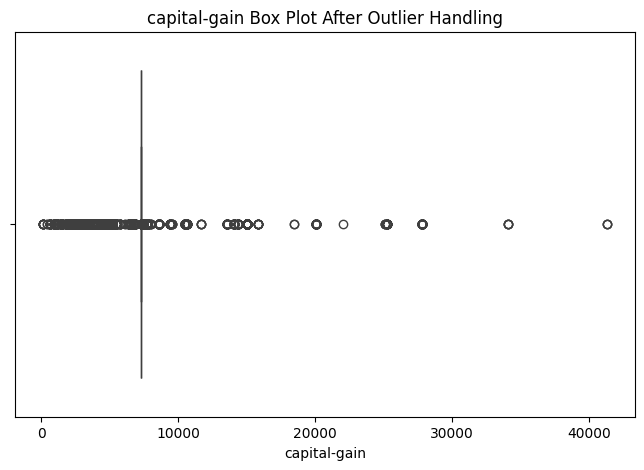

In [85]:
# Handle outliers by replacing values above 60000 with the mean of values below that threshold
outlier_threshold = 60000

mean_below_threshold = conc_data.loc[conc_data["capital-gain"] <= outlier_threshold, "capital-gain"].mean()
conc_data.loc[conc_data["capital-gain"] > outlier_threshold, "capital-gain"] = mean_below_threshold

# Create a box plot for the "capital-gain" column after handling outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=conc_data["capital-gain"])
plt.title("capital-gain Box Plot After Outlier Handling")
plt.show()

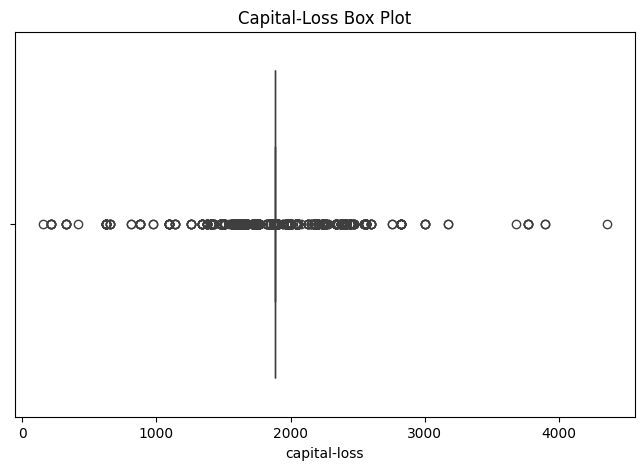

In [86]:
# Create a box plot for the "capital-loss" column
plt.figure(figsize=(8, 5))
sns.boxplot(x=conc_data["capital-loss"])
plt.title("Capital-Loss Box Plot")
plt.show()

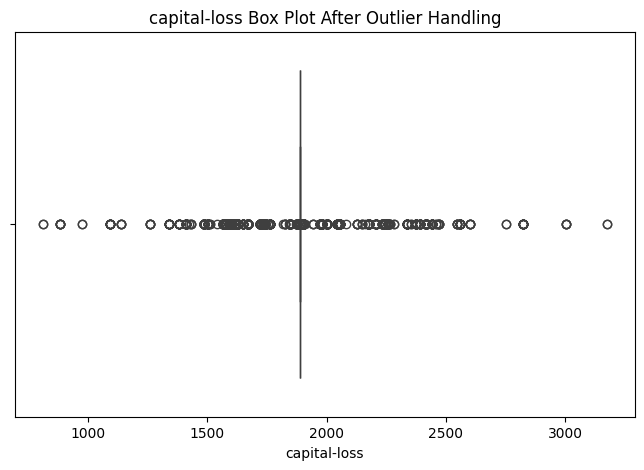

In [87]:
# Define the thresholds
lower_threshold = 800
upper_threshold = 3200

# Filter out the outliers
# Calculate the mean of values within the thresholds
mean_within_threshold = conc_data.loc[(conc_data["capital-loss"] >= lower_threshold) & 
                                      (conc_data["capital-loss"] <= upper_threshold), 
                                      "capital-loss"].mean()

# Replace values below the lower threshold and above the upper threshold with the calculated mean
conc_data.loc[conc_data["capital-loss"] < lower_threshold, "capital-loss"] = mean_within_threshold
conc_data.loc[conc_data["capital-loss"] > upper_threshold, "capital-loss"] = mean_within_threshold

# Create a box plot for the "capital-loss" column after handling outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=conc_data["capital-loss"])
plt.title("capital-loss Box Plot After Outlier Handling")
plt.show()


In [88]:
conc_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,1887.0,40,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,7298.0,1887.0,13,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,7298.0,1887.0,40,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,7298.0,1887.0,40,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,7298.0,1887.0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33.0,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,7298.0,1887.0,40,United-States,<=50K
48837,39.0,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,7298.0,1887.0,36,United-States,<=50K
48839,38.0,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,7298.0,1887.0,50,United-States,<=50K
48840,44.0,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,1887.0,40,United-States,<=50K


In [89]:
# Creating new column of income_num in dataframe. It is valued according to income.(Income : >50k = 1, <=50k = 0)
conc_data['income_num'] = conc_data['income'].map({'<=50K':0, '>50K':1})
conc_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_num
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,1887.0,40,United-States,<=50K,0
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,7298.0,1887.0,13,United-States,<=50K,0
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,7298.0,1887.0,40,United-States,<=50K,0
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,7298.0,1887.0,40,United-States,<=50K,0
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,7298.0,1887.0,40,Cuba,<=50K,0


In [90]:
# Finding the count of rows which has below_50k income and above_50k income.

below_50k=(conc_data.income_num == 0).sum()
print("Income with below 50k count :",below_50k)
above_50k=(conc_data.income_num == 1).sum()
print("Income with above 50k count :",above_50k)

Income with below 50k count : 32974
Income with above 50k count : 10917


### DATA VISUALIZATION

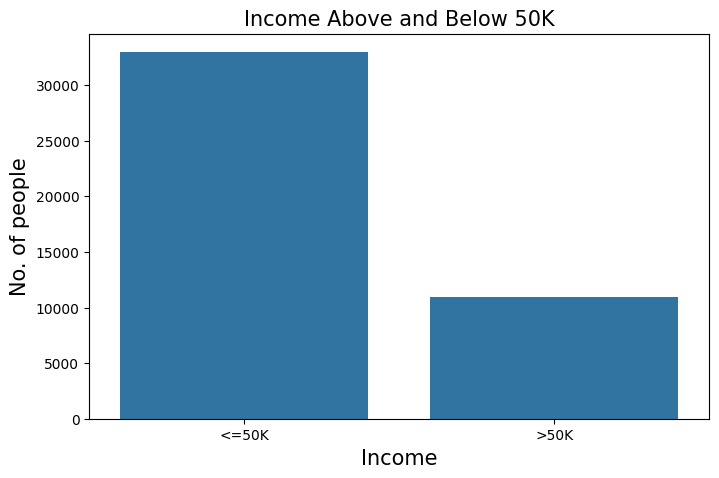

In [91]:
# Plotting bar chart income vs no. of people
fig,axes = plt.subplots(1,1,figsize=(8,5))
sns.countplot(data = conc_data, x='income')
plt.title('Income Above and Below 50K',fontsize=15)
plt.xlabel('Income',fontsize=15)
plt.ylabel('No. of people',fontsize=15)
plt.show()

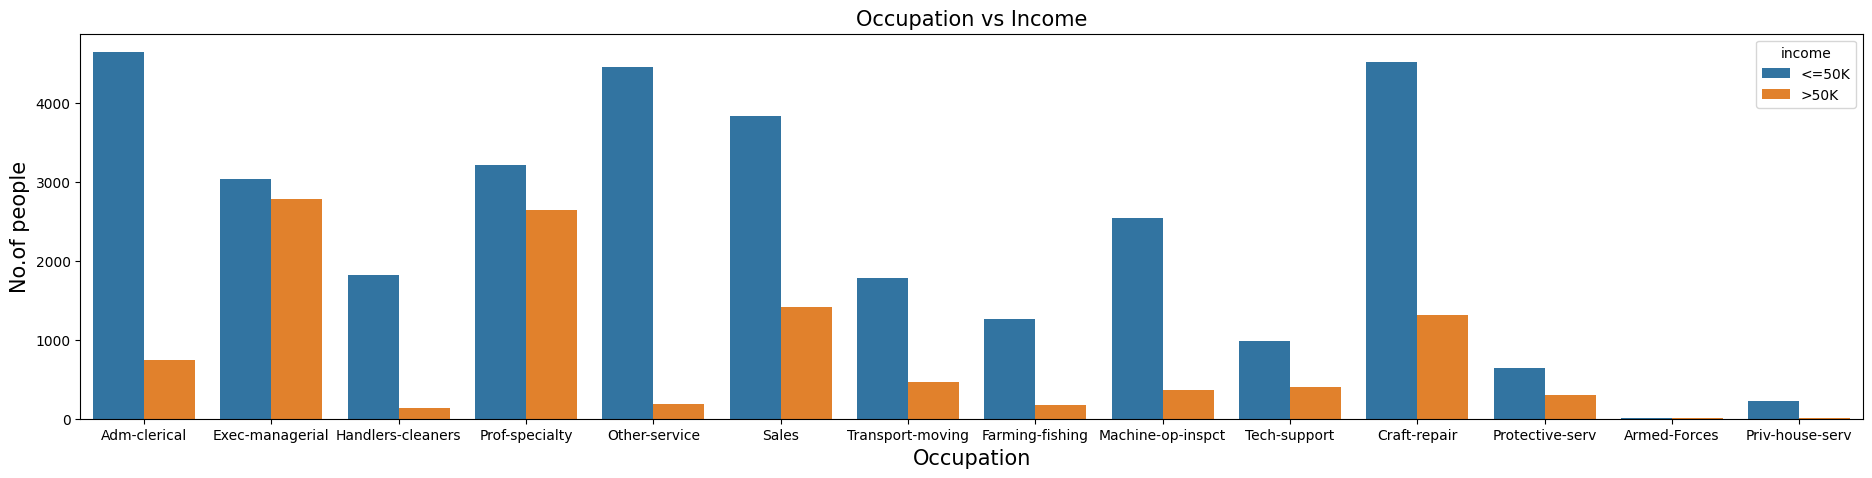

In [92]:
# Plotting the bar chart of occupation vs income count.
fig, axes = plt.subplots(1,1,figsize=(23,5))
sns.countplot(data=conc_data,x='occupation',hue='income')
plt.title('Occupation vs Income',fontsize=15)
plt.xlabel('Occupation',fontsize=15)
plt.ylabel('No.of people',fontsize=15)
plt.show()

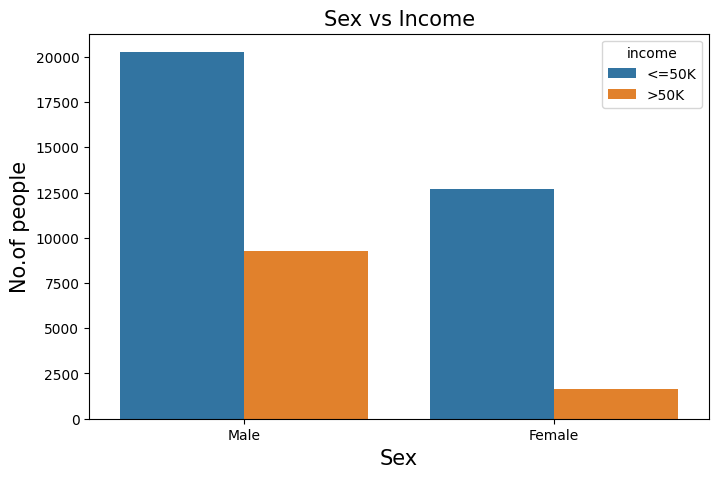

In [93]:
# Plotting the bar charts of sex vs income count.
fig, axes = plt.subplots(1,1,figsize=(8,5))
sns.countplot(data=conc_data,x='sex',hue='income')
plt.title('Sex vs Income',fontsize=15)
plt.xlabel('Sex',fontsize=15)
plt.ylabel('No.of people',fontsize=15)
plt.show()

#### BIVARIATE ANALYSIS

In [94]:
# # Bivariate Analysis of Income Vs All features
# col1 = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 
#         'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']

# palette = {" <=50K": "blue", " >50K": "green"}

# plt.figure(figsize=(25,30))
# for i in range(len(col1)):
#     plt.subplot(5,3,i+1)
#     sns.stripplot(x = conc_data['income'], y = conc_data[col1[i]], palette='crest', hue = conc_data['income'])
#     plt.title(f"Income VS {col1[i]}", fontsize = 20)
#     plt.xticks(rotation = 90, fontsize = 16)
#     plt.yticks(fontsize = 16)
#     plt.tight_layout()

In [95]:
# # Bivariate Analysis of Hours per Work Vs All features
# if len(conc_data) > 10000:  # Assuming if dataset has more than 10,000 rows, sample
#     conc_data_sample = conc_data.sample(frac=0.1, random_state=1)

# col2 = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 
#         'capital-gain', 'capital-loss', 'native-country', 'income']

# palette = {" <=50K": "blue", " >50K": "green"}

# plt.figure(figsize=(20, 45)) 
# for i in range(len(col2)):
#     plt.subplot(7, 2, i+1)
#     sns.violinplot(y=conc_data_sample['hours-per-week'], x=conc_data_sample[col2[i]])
#     plt.title(f"Hours per Week VS {col2[i]}", fontsize=20)
#     plt.xticks(rotation=90, fontsize=16)
#     plt.yticks(fontsize=16)

# plt.tight_layout() 
# plt.show()

In [96]:
# # Income VS Work of Hours
# conc_data0 = conc_data.groupby(['age', 'income']).apply(lambda x:x['hours-per-week'].count()).reset_index(name="hours")

# plt.figure(figsize=(20,10))
# sns.lineplot(x='age', y='hours', data=conc_data0, hue='income')
# plt.title("Income VS Work of Hours", fontsize=30)

In [97]:
# sns.jointplot(x ="age", y="hours-per-week", data=conc_data, kind="hex")

In [98]:
# sns.jointplot(x="fnlwgt", y="age", data=conc_data, kind="kde", cmap="plasma", thresh=0.05)

In [99]:
# sns.pairplot(conc_data, hue = 'income', palette = 'inferno')

### ENCODING CATEGORICAL VALUES

In [100]:
# Encoding columns for scaling the dataframe
le=LabelEncoder()
encoding_columns = ['workclass', 'education','education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']

for col in encoding_columns:
    conc_data[col] = le.fit_transform(conc_data[col])
conc_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_num
0,39.0,5,77516,9,12,4,0,1,4,1,2174.0,1887.0,40,38,0,0
1,50.0,4,83311,9,12,2,3,0,4,1,7298.0,1887.0,13,38,0,0
2,38.0,2,215646,11,8,0,5,1,4,1,7298.0,1887.0,40,38,0,0
3,53.0,2,234721,1,6,2,5,0,2,1,7298.0,1887.0,40,38,0,0
4,28.0,2,338409,9,12,2,9,5,2,0,7298.0,1887.0,40,4,0,0


In [101]:
X = conc_data.drop(['income'], axis=1) # Features
y = conc_data['income'] # Target variable

In [102]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [103]:
X.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_num
0,0.048716,2.914651,-1.166321,-0.348632,1.127525,0.944465,-1.482640,-0.257464,0.378911,0.696572,-3.298390,0.000376,-0.078287,0.259423,-0.575395
1,0.907868,1.871363,-1.100265,-0.348632,1.127525,-0.387011,-0.737602,-0.883280,0.378911,0.696572,-0.013178,0.000376,-2.347837,0.259423,-0.575395
2,-0.029388,-0.215213,0.408197,0.176977,-0.444727,-1.718487,-0.240911,-0.257464,0.378911,0.696572,-0.013178,0.000376,-0.078287,0.259423,-0.575395
3,1.142183,-0.215213,0.625629,-2.451069,-1.230853,-0.387011,-0.240911,-0.883280,-2.028559,0.696572,-0.013178,0.000376,-0.078287,0.259423,-0.575395
4,-0.810436,-0.215213,1.807549,-0.348632,1.127525,-0.387011,0.752472,2.245799,-2.028559,-1.435602,-0.013178,0.000376,-0.078287,-5.351064,-0.575395


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


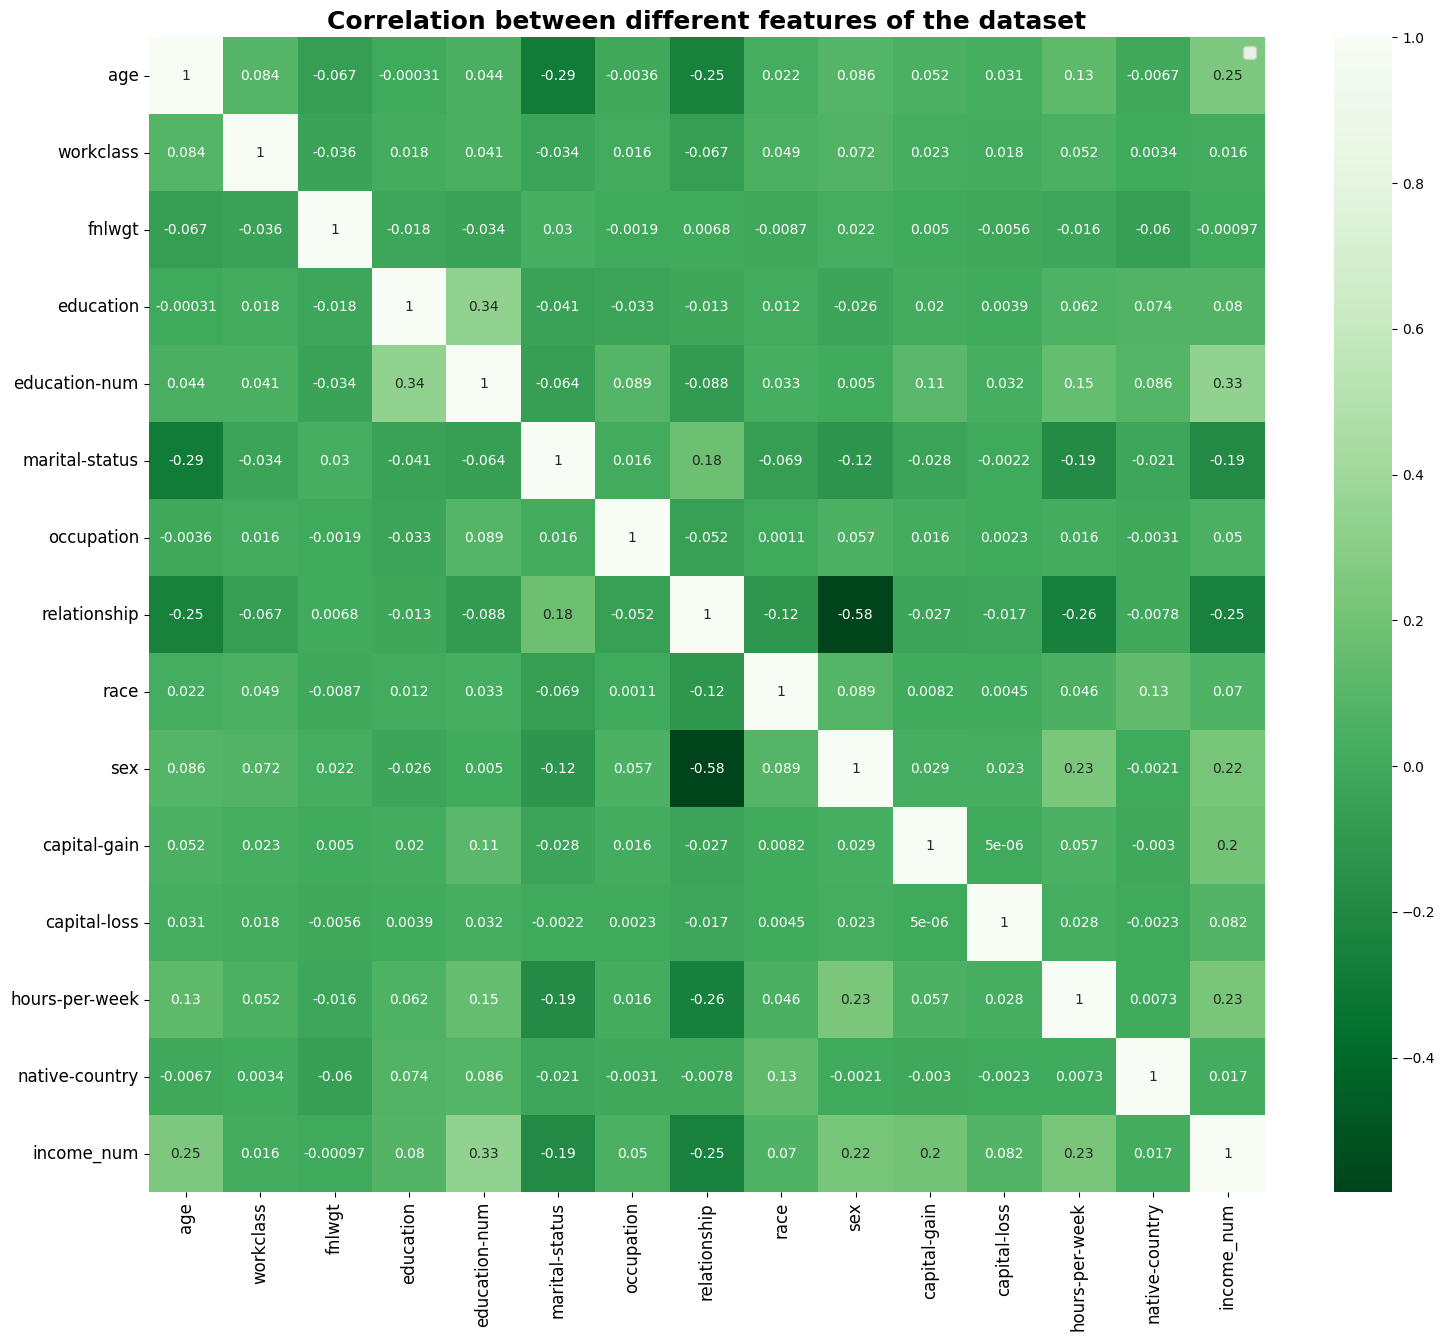

In [104]:
plt.figure(figsize = (18,15))
plt.title("Correlation between different features of the dataset", fontsize = 18, fontweight = 'bold')
sns.heatmap(X.corr(), cmap = 'Greens_r', annot = True)
plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

In [105]:
# Assuming 'df' is your DataFrame and 'target_variable' is the name of your target variable column
correlation_matrix = conc_data.corr()

# Get the absolute correlation values with respect to the target variable
correlation_with_target = correlation_matrix['income'].abs()

# Sort the attributes based on their absolute correlation values in descending order
sorted_attributes = correlation_with_target.sort_values(ascending=False)

# Display the sorted list of attributes and their corresponding absolute correlation values
print("Sorted list of attributes based on absolute correlation with the target variable:")
print(sorted_attributes)

Sorted list of attributes based on absolute correlation with the target variable:
income            1.000000
income_num        1.000000
education-num     0.332466
relationship      0.253364
age               0.247018
hours-per-week    0.229352
sex               0.217738
capital-gain      0.195479
marital-status    0.192262
capital-loss      0.081836
education         0.079780
race              0.069754
occupation        0.049986
native-country    0.017263
workclass         0.015562
fnlwgt            0.000974
Name: income, dtype: float64


Explained Variance Ratio for Each Attribute:
         Attribute  Explained Variance Ratio
0              age                  0.156310
1        workclass                  0.096177
2           fnlwgt                  0.076762
3        education                  0.076207
4    education-num                  0.068635
5   marital-status                  0.067339
6       occupation                  0.066706
7     relationship                  0.065087
8             race                  0.062517
9              sex                  0.055650
10    capital-gain                  0.054496
11    capital-loss                  0.049042
12  hours-per-week                  0.044597
13  native-country                  0.035142
14      income_num                  0.025334


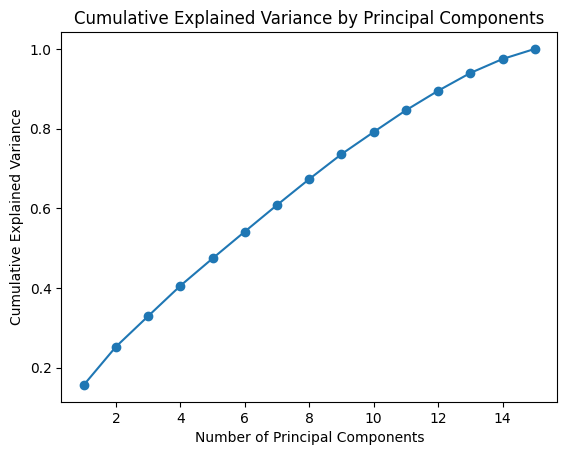

In [106]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Get the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Create a DataFrame to display attribute names and their contributions to explained variance
components_df = pd.DataFrame({'Attribute': X.columns, 'Explained Variance Ratio': explained_variance_ratio})

# Print the DataFrame
print("Explained Variance Ratio for Each Attribute:")
print(components_df)

# Plot the cumulative explained variance with attribute names
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.show()

In [107]:
# Filter attributes based on conditions
selected_pca_attributes = components_df.loc[explained_variance_ratio > 0.05, 'Attribute'].tolist()
selected_correlation_attributes = correlation_with_target[correlation_with_target > 0.1].index.tolist()

# Find the common attributes
common_attributes = set(selected_pca_attributes).intersection(selected_correlation_attributes)

# Display the common attributes
print("Common attributes satisfying the conditions:")
print(common_attributes)

Common attributes satisfying the conditions:
{'education-num', 'marital-status', 'age', 'sex', 'capital-gain', 'relationship'}


In [108]:
X = conc_data[['marital-status', 'education-num', 'relationship', 'sex', 'age', 'capital-gain']]
y = conc_data['income']

In [109]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [110]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, mean_absolute_error, classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [112]:
X_train.shape, X_test.shape

((35112, 6), (8779, 6))

In [113]:
# Creating a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
gnb = model.fit(X_train,y_train)

# Predictions on the test set
gnb_predictions = gnb.predict(X_test)

# Evaluate Naïve Bayes Classifier
print("Naïve Bayes Classifier:")
print("Accuracy:", accuracy_score(y_test, gnb_predictions))
print("Classification Report:")
print(classification_report(y_test, gnb_predictions))

Naïve Bayes Classifier:
Accuracy: 0.8020275657819798
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.87      6603
           1       0.64      0.46      0.53      2176

    accuracy                           0.80      8779
   macro avg       0.74      0.69      0.70      8779
weighted avg       0.79      0.80      0.79      8779



In [114]:
model.score(X_train, y_train)

0.8050808840282524

In [115]:
model.score(X_test, y_test)

0.8020275657819798

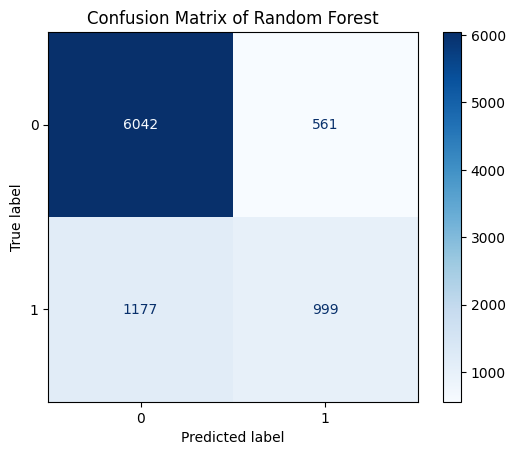

In [116]:
# Display the confusion matrix
cm = confusion_matrix(y_test, gnb_predictions, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)

disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix of Random Forest")
plt.show()

In [117]:
# Initialize the classifier
random= RandomForestClassifier(random_state=42)

# Fit GridSearchCV
rf_model = random.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

# Evaluate Naïve Bayes Classifier
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Random Forest Classifier:
Accuracy: 0.831301970611687
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      6603
           1       0.70      0.56      0.62      2176

    accuracy                           0.83      8779
   macro avg       0.78      0.74      0.76      8779
weighted avg       0.82      0.83      0.82      8779



In [118]:
random.score(X_train, y_train)

0.8622408293460925

In [119]:
random.score(X_test, y_test)

0.831301970611687

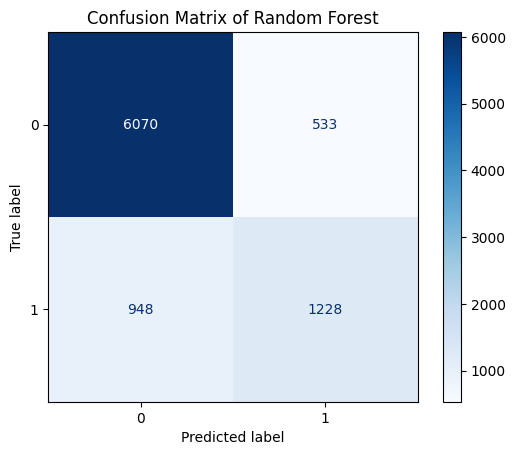

In [120]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=random.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random.classes_)

disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix of Random Forest")
plt.show()